<a href="https://colab.research.google.com/github/Maks3174/Phy/blob/main/%D0%94%D0%97_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


Дані про гриби

[посилання](https://www.kaggle.com/datasets/uciml/mushroom-classification)

In [2]:
# трохи обробки даних
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/mushrooms.csv')
df = df.drop(columns='veil-type')

encoder = OrdinalEncoder().set_output(transform='pandas')
df = encoder.fit_transform(df).astype(int)

columns = df.columns.delete(0)
data = df[columns]
df[columns] = (data - data.min()) / (data.max() - data.min())

Дані непогано збалансовані

In [3]:
df['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667


Потрібно на основі інформації про гриб зрозуміти чи він їстівним(клас 1) `class`

# Завдання 1
Створіть клас Dataset для тренувальних та тестових даних

In [5]:
class MushroomDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe
        self.features = dataframe.drop(columns='class').values
        self.labels = dataframe['class'].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

dataset = MushroomDataset(df)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])



# Завдання 2
Створіть DataLoader

In [6]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Завдання 3
Створіть нейромережу

In [7]:
class MushroomNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MushroomNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

input_size = len(columns)
hidden_size = 50
output_size = 2

model = MushroomNet(input_size, hidden_size, output_size)


# Завдання 4
Визначте функцію втрат та оптимізатор, можливо графік швидкості навчання

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def plot_learning_curve(losses):
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.show()


# Завдання 5
Натренуйте нейромережу.

Epoch 1/20, Loss: 0.542095892569598
Epoch 2/20, Loss: 0.4066242254247852
Epoch 3/20, Loss: 0.3783128943805601
Epoch 4/20, Loss: 0.3651441340060795
Epoch 5/20, Loss: 0.3574400332336332
Epoch 6/20, Loss: 0.3527560497031492
Epoch 7/20, Loss: 0.3498859868622294
Epoch 8/20, Loss: 0.3481919873578876
Epoch 9/20, Loss: 0.34710660153159906
Epoch 10/20, Loss: 0.3463073933825773
Epoch 11/20, Loss: 0.34549180622778686
Epoch 12/20, Loss: 0.3449585979767874
Epoch 13/20, Loss: 0.3445901780151853
Epoch 14/20, Loss: 0.347264347707524
Epoch 15/20, Loss: 0.34403495023063585
Epoch 16/20, Loss: 0.3438398328189756
Epoch 17/20, Loss: 0.3437395297429141
Epoch 18/20, Loss: 0.34361455983975353
Epoch 19/20, Loss: 0.343534589398141
Epoch 20/20, Loss: 0.3434249820078121


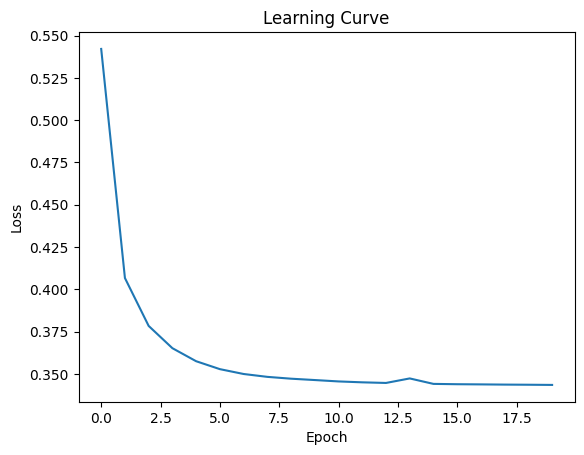

In [9]:
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')

plot_learning_curve(train_losses)


# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [10]:
torch.save(model.state_dict(), 'mushroom_model.pth')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test data: {100 * correct / total}%')


Accuracy of the model on the test data: 97.66153846153846%
